In this project, we analyze the space flight data of Spacex space research company Falcon 9 rocket.

# About the Dataset
Space Exploration Technologies Corp. (SpaceX) is an American aerospace manufacturer, space transportation services.

Falcon 9 is a rocket that can carry cargo and humans into Earth orbit, even reaching the International Space Station. It is produced by American aerospace company SpaceX. Technically, it is a partially reuseable, medium lift launch vehicle.

Falcon Heavy is a partially reusable heavy-lift launch vehicle that is produced by SpaceX, an American aerospace manufacturer.

In [7]:
from IPython.display import Image

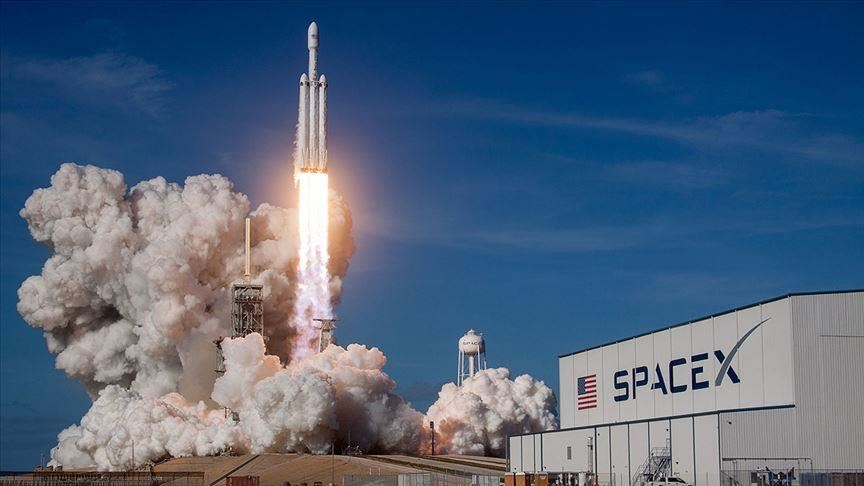

In [9]:
Image("D:/G-PYTHON/Python 42/Data science/Data Science Projects/EDA SpaceX Launches Falcon9 and Falcon Heavy/spacex.jpg")

Notebook Color Scheme: 


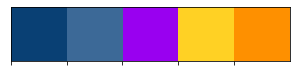

In [10]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Custom Colors
class clr:
    S = '\033[1m' + '\033[96m'
    E = '\033[0m'
    
my_colors = ["#094074","#3C6997", "#9900F0", "#FFD124", "#FE9000"]

print(clr.S + "Notebook Color Scheme: " + clr.E)
sns.palplot(sns.color_palette(my_colors))

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
df = pd.read_csv('D:/G-PYTHON/Python 42/Data science/Data Science Projects/EDA SpaceX Launches Falcon9 and Falcon Heavy/dataset/SpaceX_Falcon9.csv')

In [17]:
df.describe()

,Unnamed: 0,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
count,90.000000,90.000000,85.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,44.500000,45.500000,6123.547647,1.788889,3.500000,3.133333,-86.366477,29.449963
std,26.124701,26.124701,4870.916417,1.213172,1.595288,4.097684,14.149518,2.141306
min,0.000000,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857
25%,22.250000,23.250000,2482.000000,1.000000,2.000000,0.000000,-80.603956,28.561857
50%,44.500000,45.500000,4535.000000,1.000000,4.000000,1.000000,-80.577366,28.561857
75%,66.750000,67.750000,9600.000000,2.000000,5.000000,4.000000,-80.577366,28.608058
max,89.000000,90.000000,15600.000000,6.000000,5.000000,12.000000,-80.577366,34.632093


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      90 non-null     int64  
 1   FlightNumber    90 non-null     int64  
 2   Date            90 non-null     object 
 3   BoosterVersion  90 non-null     object 
 4   PayloadMass     85 non-null     float64
 5   Orbit           90 non-null     object 
 6   LaunchSite      90 non-null     object 
 7   Outcome         90 non-null     object 
 8   Flights         90 non-null     int64  
 9   GridFins        90 non-null     bool   
 10  Reused          90 non-null     bool   
 11  Legs            90 non-null     bool   
 12  LandingPad      64 non-null     object 
 13  Block           90 non-null     float64
 14  ReusedCount     90 non-null     int64  
 15  Serial          90 non-null     object 
 16  Longitude       90 non-null     float64
 17  Latitude        90 non-null     float

In [19]:
df.head()

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [20]:
df.columns

Index(['Unnamed: 0', 'FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass',
       'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused',
       'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')

In [21]:
#Check for null values 
df.isna().any()

Unnamed: 0        False
FlightNumber      False
Date              False
BoosterVersion    False
PayloadMass        True
Orbit             False
LaunchSite        False
Outcome           False
Flights           False
GridFins          False
Reused            False
Legs              False
LandingPad         True
Block             False
ReusedCount       False
Serial            False
Longitude         False
Latitude          False
dtype: bool

In [22]:
df.replace('Nan',np.nan, inplace = True)

In [23]:
df.dropna(axis = 0, inplace = True)

In [24]:
df.isna().any()

Unnamed: 0        False
FlightNumber      False
Date              False
BoosterVersion    False
PayloadMass       False
Orbit             False
LaunchSite        False
Outcome           False
Flights           False
GridFins          False
Reused            False
Legs              False
LandingPad        False
Block             False
ReusedCount       False
Serial            False
Longitude         False
Latitude          False
dtype: bool

In [25]:
#Drop some unwanted columns
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [26]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
11,12,2015-01-10,Falcon 9,2395.0,ISS,CCSFS SLC 40,False ASDS,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1012,-80.577366,28.561857
13,14,2015-04-14,Falcon 9,1898.0,ISS,CCSFS SLC 40,False ASDS,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1015,-80.577366,28.561857
15,16,2015-06-28,Falcon 9,2477.0,ISS,CCSFS SLC 40,None ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,1.0,0,B1018,-80.577366,28.561857
16,17,2015-12-22,Falcon 9,2034.0,LEO,CCSFS SLC 40,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,1.0,0,B1019,-80.577366,28.561857
17,18,2016-01-17,Falcon 9,553.0,PO,VAFB SLC 4E,False ASDS,1,True,False,True,5e9e3033383ecbb9e534e7cc,1.0,0,B1017,-120.610829,34.632093


In [27]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')

In [30]:
launch_site = df['LaunchSite'].value_counts()
launch_site

CCSFS SLC 40    34
KSC LC 39A      17
VAFB SLC 4E     10
Name: LaunchSite, dtype: int64

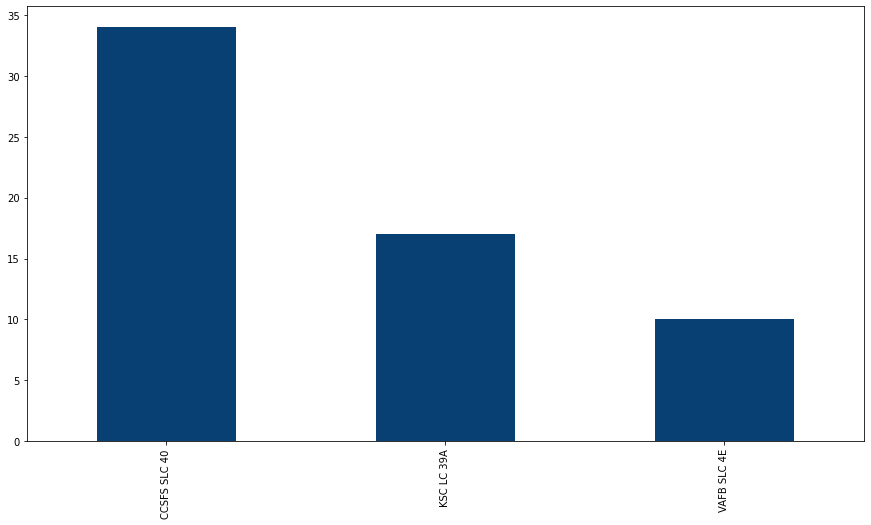

In [31]:
plt.figure(figsize = (15,8))
launch_site.plot(kind = "bar", color = my_colors[0])
plt.show()

In [32]:
most_orbit = df['Orbit'].value_counts()
most_orbit

ISS     16
GTO     15
VLEO    14
PO       6
SSO      5
LEO      2
MEO      2
HEO      1
Name: Orbit, dtype: int64

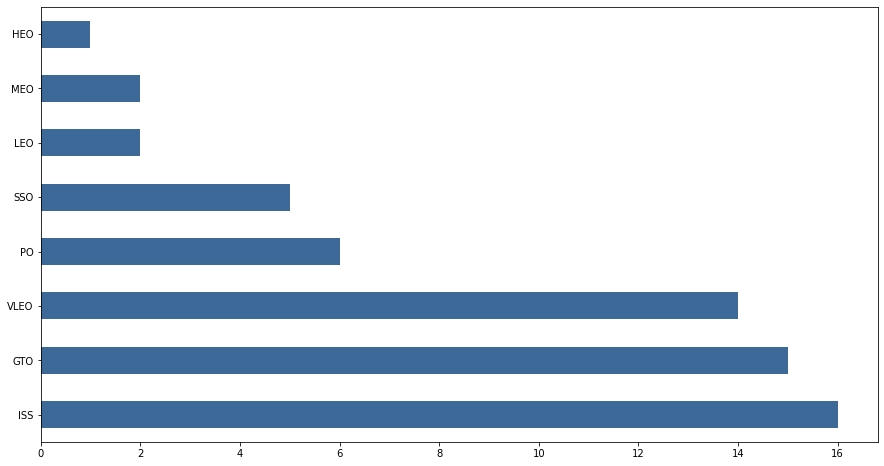

In [36]:
plt.figure(figsize = (15,8))
most_orbit.plot(kind = "barh",color = my_colors[1] )
plt.show()

## Our second dataset.

In [37]:
df1 = pd.read_csv('D:/G-PYTHON/Python 42/Data science/Data Science Projects/EDA SpaceX Launches Falcon9 and Falcon Heavy/dataset/Falcon 9 and Falcon Heavy launches .csv')

### Who are the major Customers?

In [38]:
Most_customers = df1['Customer'].value_counts()
Most_customers

SpaceX                                    46
NASA (CRS)                                25
Iridium Communications                     7
SES                                        6
Various                                    5
                                          ..
NASA (COTS) NRO                            1
CONAE                                      1
Es'hailSat                                 1
Spaceflight Industries                     1
GlobalstarUnknown US Government Agency     1
Name: Customer, Length: 62, dtype: int64

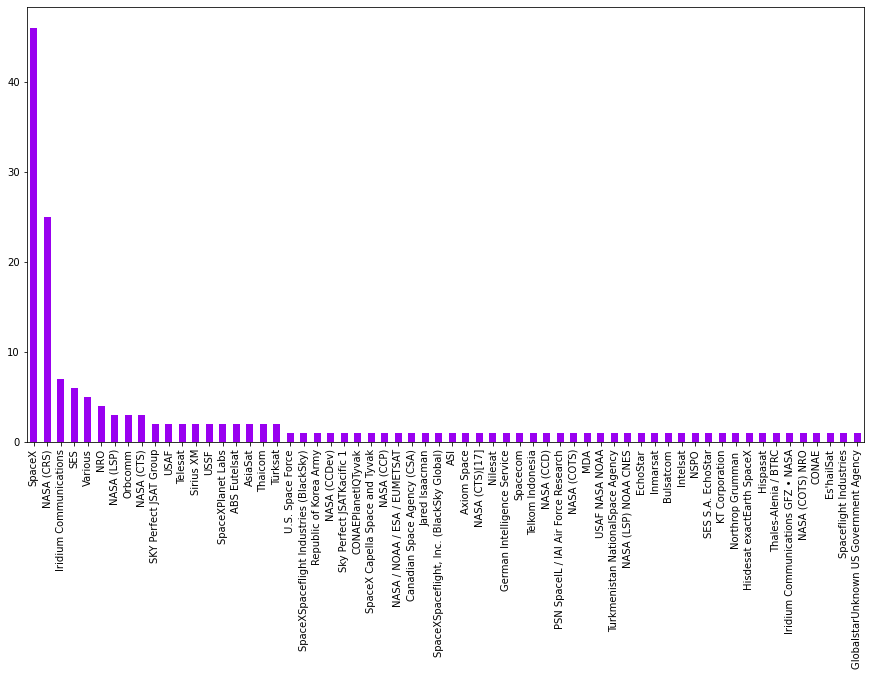

In [39]:
plt.figure(figsize = (15,8))
Most_customers.plot(kind = 'bar', color = my_colors[2])
plt.show()

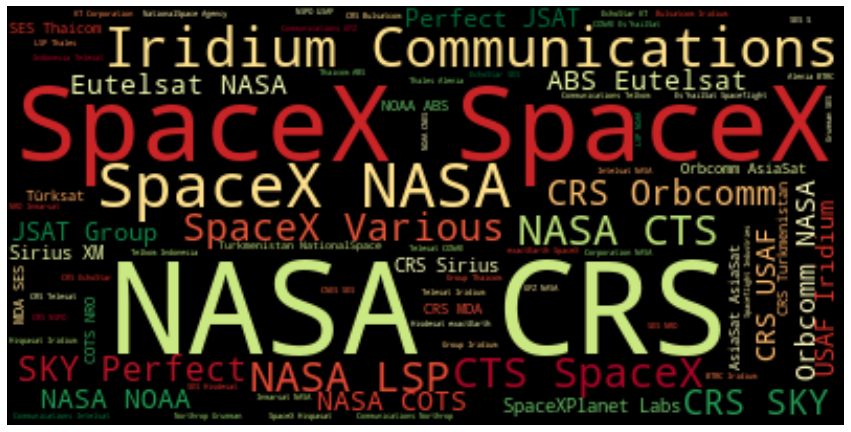

In [40]:
from wordcloud import WordCloud

# Generate a word cloud 
wordcloud1 = WordCloud(collocation_threshold = 2,
                      collocations= True,
                      colormap="RdYlGn").generate(' '.join(df['Customer'].astype(str)))

# Generate plot
plt.figure(figsize = (15,8))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

### What were the rate of Launch outcomes?

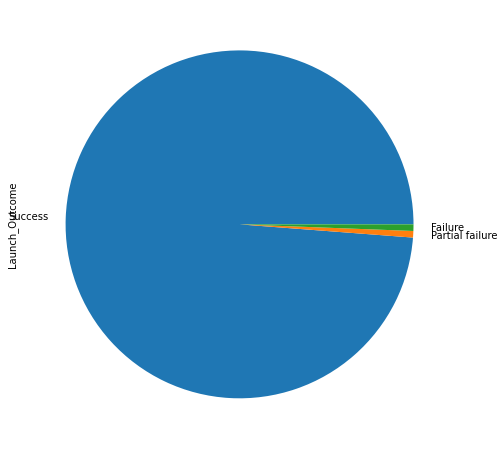

In [41]:
outcomes_of_launches = df1['Launch_Outcome'].value_counts()
plt.figure(figsize = (15,8))
outcomes_of_launches.plot(kind = 'pie')
plt.show()

### What is the maximum Payload Mass that rocket can take up?

In [43]:
max_payload = df1['Payload_Mass'].value_counts()
max_payload

15,600        25
16,250         9
9,600          7
Classified     5
14,500         4
              ..
6,070          1
5,600          1
2,490          1
4,600          1
2,630          1
Name: Payload_Mass, Length: 107, dtype: int64

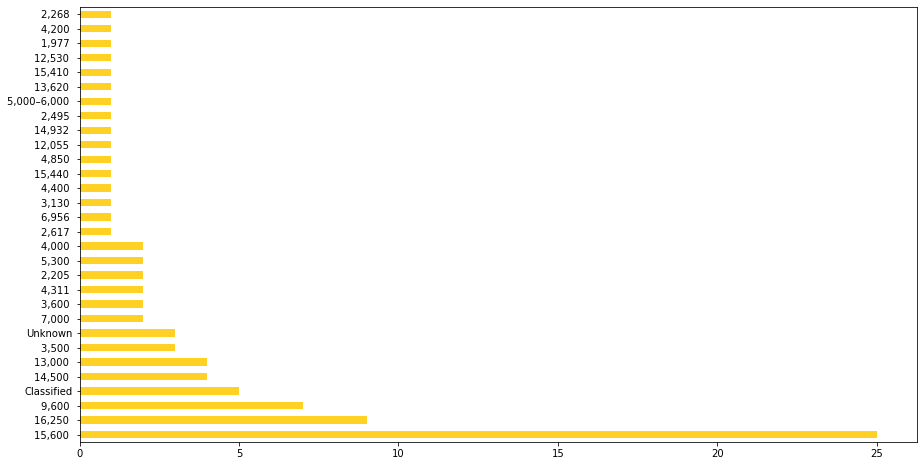

In [44]:
plt.figure(figsize = (15,8))
max_payload.head(30).plot(kind = 'barh', color = my_colors[3])
plt.show()

### Which month saw most launches?

In [45]:
most_launches = df1['Date'].value_counts()
most_launches

8 October 2012     2
4 June 2010        1
23 April 2021      1
24 January 2021    1
4 February 2021    1
                  ..
29 June 2018       1
22 July 2018       1
25 July 2018       1
7 August 2018      1
15 July 2022       1
Name: Date, Length: 164, dtype: int64

### Which time seems most optimum for launch?

In [47]:
most_launches_time = df1['Time'].value_counts()
most_launches_time

04:45       3
00:35       2
14:17       2
06:00       2
23:03       2
           ..
11:39       1
05:18       1
02:22       1
20:46       1
00:44:22    1
Name: Time, Length: 156, dtype: int64

## Did Booster made a successful landing?

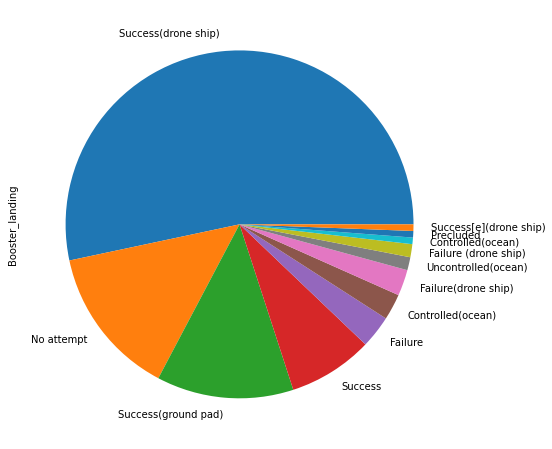

In [49]:
outcomes_of_landing = df1['Booster_landing'].value_counts()
plt.figure(figsize = (15,8))
outcomes_of_landing.plot(kind = 'pie')
plt.show()

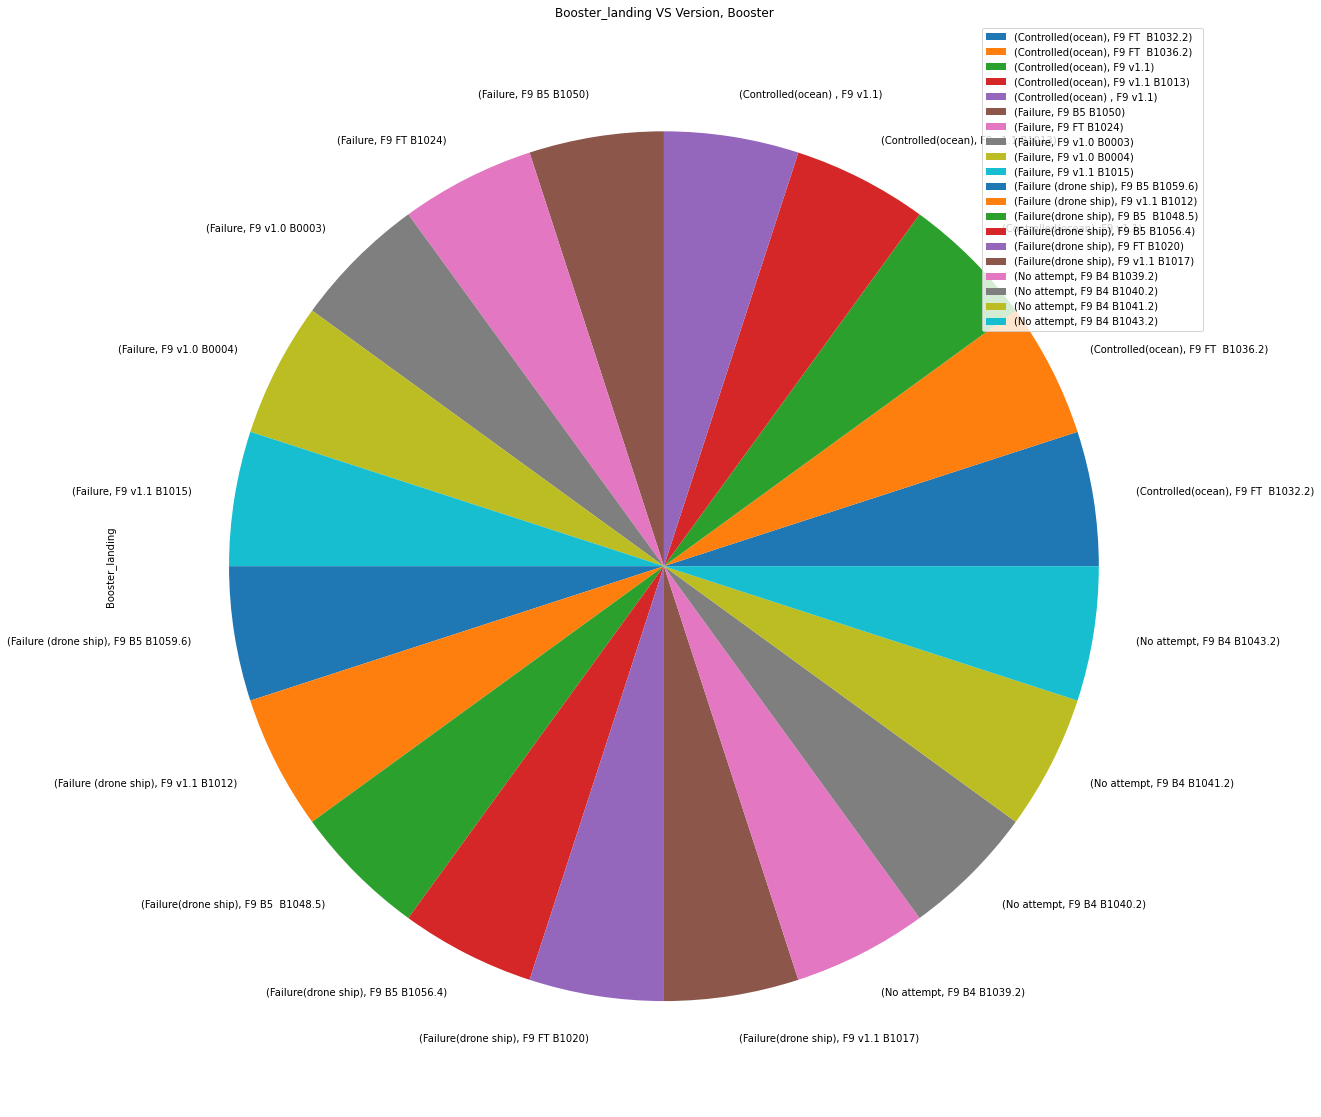

In [50]:
plt.figure(figsize=(40,20))
year_club = df1.groupby(['Booster_landing', 'Version, Booster']).Booster_landing.size().head(20).plot(kind = 'pie')
plt.title('Booster_landing VS Version, Booster')
plt.legend()
plt.show()